In [1]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec

In [2]:
# This is supposed to display all the outputs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x, y, z, u1, u2, u3, v1, v2, v3, t')

## 1. Vectors & Geometry

#### Numerical or Symbolic

In [4]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

#### Addition and Multiplication

In [5]:
print( '2*(a+b) = ',  2*(a+b) )
u.subs([(u1,1),(u2,2),(u3,3)])+v.subs([(v1,1),(v2,2),(v3,3)])

2*(a+b) =  [16 20 24]


Matrix([
[2],
[4],
[6]])

#### Dot Product

In [6]:
print(np.dot(a,b))
print(a.dot(b))
np.dot(v.transpose(),u)

50
50


array([[u1*v1 + u2*v2 + u3*v3]], dtype=object)

In [7]:
u.dot(v)

u1*v1 + u2*v2 + u3*v3

In [8]:
p1, p2, p3 = smp.symbols('p1, p2, p3')
p = smp.Matrix([[p1,p2,p3]])
p
np.dot(p,u)
u.transpose()

Matrix([[p1, p2, p3]])

array([[p1*u1 + p2*u2 + p3*u3]], dtype=object)

Matrix([[u1, u2, u3]])

#### Cross Product

In [9]:
np.cross(a,b)

array([-6, 12, -6])

In [10]:
u.cross(v)

Matrix([
[ u2*v3 - u3*v2],
[-u1*v3 + u3*v1],
[ u1*v2 - u2*v1]])

#### Length of vector

In [11]:
print(a)
print(np.linalg.norm(a))
u.norm()

[1 2 3]
3.7416573867739413


sqrt(Abs(u1)**2 + Abs(u2)**2 + Abs(u3)**2)

#### Vector Projection

$
\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v
$

In [12]:
proj_b_a = (np.dot(a,b)*b/np.linalg.norm(b)**2)
proj_b_a

array([1.80412371, 2.06185567, 2.31958763])

In [13]:
proj_v_u = (u.dot(v)/v.norm()**2)*v
proj_v_u

Matrix([
[v1*(u1*v1 + u2*v2 + u3*v3)/(Abs(v1)**2 + Abs(v2)**2 + Abs(v3)**2)],
[v2*(u1*v1 + u2*v2 + u3*v3)/(Abs(v1)**2 + Abs(v2)**2 + Abs(v3)**2)],
[v3*(u1*v1 + u2*v2 + u3*v3)/(Abs(v1)**2 + Abs(v2)**2 + Abs(v3)**2)]])

### Lines/Plans in Space

$\text{Lines}:\vec{r}(t) = \vec{r_0} + t\vec{v}$

In [14]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

$\text{Planes}:\vec{n} \cdot (P_0 - \langle {x,y,z} \rangle) = 0$

In [15]:
p0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(p0-r)

-x - y - z + 16

 **Example** : Find the vector parallel to the line of intersection of the two planes $3x-6y-2z=15$ and $2x+y-2z=5$ (It's going to be perpendicular to both normal vectors)

In [16]:
n1 = np.array([3,-6,-2])
n2 = np.array([2,1,-2])
ans = np.cross(n1,n2)
ans

array([14,  2, 15])

### Vector Calculus

#### Vector Derivatives

In [17]:
pos = smp.Matrix([3*t,smp.sin(t),t**2])
pos

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [18]:
smp.diff(pos,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example** : Find the angle between the velocity and accelaration as a function of $\theta(t)$

In [19]:
vel = smp.diff(pos,t)
acc = smp.diff(vel,t)
theta = smp.acos( vel.dot(acc) / (vel.norm() * acc.norm()) )
theta

acos((4*t - sin(t)*cos(t))/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [20]:
theta.subs(t,0.4040404).evalf()

1.37965431672865

In [21]:
time_tt = np.linspace(0,10,100)
angle_aa = smp.lambdify([t],theta)(time_tt)

Text(0.5, 0, '$t$')

Text(0, 0.5, '$\\theta(t)$')

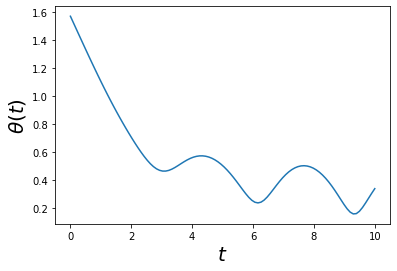

In [22]:
# plot usong matplotlib
plt.plot(time_tt,angle_aa)
plt.xlabel('$t$',fontsize=20)
plt.ylabel(r'$\theta(t)$',fontsize=20)
plt.show()

#### Vector Integrals

In [23]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(t**2 + 1)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [24]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [25]:
smp.integrate(r,t)

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [26]:
r2 = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3 , smp.exp(-t**4), 1/(t**2 + 3)])

Integrate from $t = 0$ to $t = 4$

In [27]:
r2_num = smp.lambdify([t],r2)
quad_vec(r2_num,0,4)    # with error

(array([[-4.83559254e+05],
        [ 9.06402477e-01],
        [ 6.70972506e-01]]), 1.1186648566521124e-05)

In [28]:
quad_vec(r2_num,0,4)[0]     # if we don't want the error

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

### Arclength

$$
L = \int_{a}^{b} \sqrt{dx^2 + dy^2 + dz^2} = \int_{a}^{b} \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2 + \left(\frac{dz}{dt}\right)^2 dt}
$$

Rare Cases can be done symbolically. Find Arclength of
$\langle {0,t,t^2} \rangle$ from $t = 0$ to $t = 1$ 

In [29]:
r3 = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r3,t).norm() , (t,0,1))

asinh(2)/4 + sqrt(5)/2

In most cases it needs to be done numerically.
Find Arclength of $\langle {e^{t}, \sin(t), t^4} \rangle $ from
$t = 0$ to $t = 1$

In [30]:
r4 = smp.Matrix([smp.exp(t), smp.sin(t), t**4])
r4_num = smp.lambdify([t], smp.diff(r4,t).norm() )
quad(r4_num, 0, 1)[0]

2.316977146444862

### Other Relavent quantities

if $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element,    
$ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2} = |d\vec{r} / dt| = |\vec{v}|$  
then the other important quantities are  

- Unit Tangent vector : $\hat{T} = \frac{d\vec{r}}{dt} \frac{1}{|d\vec{r}/dt|} = \frac{\vec{v}}{|\vec{v}|}$   
- Curvature : $\kappa = |\frac{d\vec{T}}{dt}| \frac{1}{|\vec{v}|}$   
- Unit Normal Vector to Curve : $\hat{N} = \frac {d\vec{T}/dt} {|d\vec{T}/dt|}$

**Example** : Find all these for $\vec{r}(t) = \langle {a\cos(t)e^{t}, b\sin(t), ct} \rangle $

In [31]:
t, a, b,c = smp.symbols('t, a, b, c', pos=True, real=True) 

Define the path

In [32]:
r = smp.Matrix([a*smp.cos(t)*smp.exp(t), b*smp.sin(t), c*t])
r

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

Define the velocity vector $\vec{v}$ and speed $|\vec{v}|$

In [33]:
v = smp.diff(r,t)
v_norm = v.norm()

Get $\hat{T}, \kappa, \hat{N}$

In [34]:
T = v/v_norm
kappa = smp.diff(T,t).norm() / v_norm
N = smp.diff(T,t) / smp.diff(T,t).norm()

Can evaluate the values in certain points

In [35]:
kappa.subs([(t,2), (a,3), (b,4), (c,5)]).evalf()

0.00775458595406284

In [36]:
N.subs([(t,2), (a,3), (b,4), (c,5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

Can make continuous plots

In [37]:
kappa_num = smp.lambdify([t,a,b,c],kappa)

In [38]:
tt = np.linspace(0,2,100)
kk = kappa_num(tt, 3, 4, 5)

Text(0.5, 0, '$t$')

Text(0, 0.5, '$\\kappa(t)$')

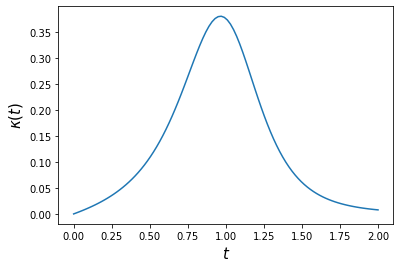

In [39]:
plt.plot(tt,kk)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$\kappa(t)$',fontsize=15)
plt.show()

## 2. Partial/Directional Derivatives

In [40]:
x, y, z = smp.symbols('x, y, z')

### Basics

Partial Derivatives $\frac{\partial{f}}{\partial{x}}$ and $\frac{\partial{f}}{\partial{y}}$ of $f(x,y) = y^2 \sin(x+y)$

In [41]:
f = y**2 * smp.sin(x+y)
df_dx = smp.diff(f,x)
df_dy = smp.diff(f,y)

or little complicated things like $\frac{\partial^3{f}}{\partial{xy^2}}$

In [42]:
df3_dxy2 = smp.diff(f,x,y,y)

In [43]:
df_dx 
df_dy
df3_dxy2

y**2*cos(x + y)

y**2*cos(x + y) + 2*y*sin(x + y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### The Chain Rule

In [44]:
t = smp.symbols('t')
x, y, z, w, v = smp.symbols('x, y, z, w, v', cls=smp.Function)

+ Suppose $x, y,$ and $z$ are functions of $t$
+ $w$ is a function of $x, y,$ and $z$. i.e $w = w(x, y, z)$

* Find $\frac{dw}{dt}$

In [45]:
x = x(t)
y = y(t)
z = z(t)
w = w(x,y,z)

In [46]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

put in specific function:

In [47]:
w1 = x**2 + smp.exp(y) * smp.sin(z)
smp.diff(w1,t).subs([(x,smp.sin(t)), (y,smp.cos(t)), (z,t**2)])
smp.diff(w1,t).subs([(x,smp.sin(t)), (y,smp.cos(t)), (z,t**2)]).doit()

exp(cos(t))*sin(t**2)*Derivative(cos(t), t) + exp(cos(t))*cos(t**2)*Derivative(t**2, t) + 2*sin(t)*Derivative(sin(t), t)

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

### Gradients

Gradients: $\nabla{f}$  
Now we will deal with particular coordinate system

In [48]:
C = CoordSys3D('')

In [49]:
f = C.x*smp.sin(C.y)
f
gradient(f)

.x*sin(.y)

(sin(.y))*.i + (.x*cos(.y))*.j

In [50]:
gradient(f).to_matrix(C)
gradient(f).to_matrix(C).subs([(C.y,1)])

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

### Directional Derivatives

Directional derivatives $D_{u}f = \nabla{f} \cdot u$ 

In [51]:
u = 4*C.i - 3*C.j + 2*C.k
# make into unit vector
u = u.normalize()
u
gradient(f)

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

(sin(.y))*.i + (.x*cos(.y))*.j

In [52]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

### Extreme Values and Saddle Points

Extreme Values of $f(x,y)$ can occur at

1. Boundary points of the domain of $f$
2. Critical Points $(f_x = f_y = 0)$

if,  

(i) $f_{xx} < 0$ and $f_{xx} f_{yy} - (f_{xy})^2 > 0$ at (a,b) then *local Maximum*  
(ii) $f_{xx} > 0$ and $f_{xx} f_{yy} - (f_{xy})^2 > 0$ at (a,b) then *local Minimum*  
(iii) $f_{xx}f_{yy} - (f_{xy})^2 < 0 $ at (a,b) then *Saddle Point*  
(iv) $f_{xx}f_{yy} - (f_{xy})^2= 0 $ at (a,b) then *inconclusive*

In [53]:
x, y = smp.symbols('x, y', real=True)
f = x**3 + 3*x*y + y**3
f
smp.diff(f,x)
smp.diff(f,y)

x**3 + 3*x*y + y**3

3*x**2 + 3*y

3*x + 3*y**2

In [54]:
smp.solve([smp.diff(f,x), smp.diff(f,y)])

[{x: -1, y: -1}, {x: 0, y: 0}]

In [55]:
fxx = smp.diff(f,x,x)
fyy = smp.diff(f,y,y)
fxy = smp.diff(f,x,y)

In [56]:
fxx_num1 = fxx.subs([(x,-1),(y,-1)])
fyy_num1 = fyy.subs([(x,-1),(y,-1)])
fxy_num1 = fxy.subs([(x,-1),(y,-1)])

fxx_num2 = fxx.subs([(x,0),(y,0)])
fyy_num2 = fyy.subs([(x,0),(y,0)])
fxy_num2 = fxy.subs([(x,0),(y,0)])

In [57]:
# for (x,y) at (-1,-1)

if (fxx_num1 < 0 and (fxx_num1 * fyy_num1 - (fxy_num1)**2) >0):
    print('Local Maxima')
elif (fxx_num1 > 0 and (fxx_num1 * fyy_num1 - (fxy_num1)**2) >0):
    print('Local Minima')
elif ((fxx_num1 * fyy_num1 - (fxy_num1)**2) <0):
    print('Saddle Point')
else:
    print('Inconclusive')

Local Maxima


In [58]:
# for (x,y) at (0,0)

if (fxx_num2 < 0 and (fxx_num2 * fyy_num2 - (fxy_num2)**2) >0):
    print('Local Maxima')
elif (fxx_num2 > 0 and (fxx_num2 * fyy_num2 - (fxy_num2)**2) >0):
    print('Local Minima')
elif ((fxx_num2 * fyy_num2 - (fxy_num2)**2) <0):
    print('Saddle Point')
else:
    print('Inconclusive')

Saddle Point


### Lagrange Multipliers

Minimize $f(x,y,z)$ subject to the constraint $g(x,y,z) = 0$  

- Requirement solving the two equations $\nabla{f} = \lambda \nabla g$  and $g(x,y,z) = 0$

**Example** : A Space Probe hs the shape of an ellipsoid $4x^2 + y^2 + 4z^2 = 16$ and after sitting in the sun for an hour, the temperature on its surface is given by $T(x,y,z) = 8x^2 + 4yz - 16z + 600$. Find the hottest point on the surface.  

Note that, $g = 4x^2 + y^2 + 4z^2 - 16$ and $f = T = 8x^2 + 4yz - 16z + 600$ here  

In [59]:
C = CoordSys3D('')

In [60]:
lam = smp.symbols('\lambda')
g = 4*C.x**2 + C.y**2 + 4*C.z**2 - 16
f = 8*C.x**2 + 4*C.y*C.z - 16*C.z + 600
eq1 = gradient(f) - lam*gradient(g)
eq1 = eq1.to_matrix(C)
eq2 = g
sols = smp.solve([eq1,eq2])
sols

[{.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2},
 {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)},
 {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)},
 {.x: 0, .y: 4, .z: 0, \lambda: 0},
 {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}]

In [61]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


## 3. Multiple Integrals

In rare cases these can be done symbolically:
$$
\int_{0}^{1} \int_{0}^{1-x^2} \int_{3}^{4-x^2-y^2} xdzdydx 
$$

In [62]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f,(z,3,4-x**2-y**2),(y,0,1-x**2),(x,0,1))

1/8

some multiple integrals are needed to be solved numerically.  
such as in the example :
$$
\int_{0}^{1} \int_{0}^{1-x^2} \int_{3}^{4-x^2-y^2} {xe^{-y}\cos(z)}dzdydx
$$

here scipy can be used.

In [63]:
from scipy.integrate import tplquad

In [64]:

f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f,0,1,
            lambda x:0, lambda x: 1-x**2,
            lambda x, y:3, lambda x, y: 4-x**2-y**2)[0]

-0.09109526451447894

## 4. Integrals and Vector Fields

### Line Integrals(Scalar)

given $\vec{r(t)} = \langle {g(t),h(t),k(t)} \rangle$ the line integral of $f(x,y,z)$ along the curve is  
$$
\int_{C} f(x,y,z) ds = \int_{a}^{b} f( g(t),h(t),k(t) ) |{d\vec{r}}/{dt}| dt
$$

In [65]:
t = smp.symbols('t',real=True)
x, y, z, f = smp.symbols('x, y, z, f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x, y, z])
f = f(x,y,z)

In [66]:
integrand = f*smp.diff(r,t).norm()
smp.integrate(integrand,(t,a,b))

Integral(sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t)), (t, a, b))

suppose
- $\vec{r}(t) = \langle {\cos(t), \sin(t), t} \rangle$
- $f(x,y,z) = 2xy + \sqrt{z}$  

and we are going from $t = 0$ to $t = 2\pi$.

In [67]:
integrand1 = integrand.subs([(f,2*x*y + smp.sqrt(z)), 
                        (x,smp.cos(t)), (y,smp.sin(t)), (z,t)]).doit().simplify()

smp.integrate(integrand1,(t,0,2*smp.pi))

sqrt(2)/2 + sqrt(2)*(-1/2 + 4*sqrt(2)*pi**(3/2)/3)

In general, can't be done symbolically. Consider now  
- $\vec{r}(t) = \langle {3\cos(t), 2\sin(t), e^{t/4}} \rangle$
- $f(x,y,z) = 2xy + \sqrt{z}$  

and we are going from $t = 0$ to $t = 2\pi$.

In [68]:
integrand2 = integrand.subs([(f,2*x*y + smp.sqrt(z)), 
                        (x,3*smp.cos(t)), (y,2*smp.sin(t)), (z,smp.exp(t/4))]).doit().simplify()

integrand2

(exp(t/8) + 6*sin(2*t))*sqrt(exp(t/2) + 80*sin(t)**2 + 64)/4

In [69]:
smp.integrate(integrand2,(t,0,2*smp.pi))

Integral(6*sqrt(exp(t/2) + 80*sin(t)**2 + 64)*sin(2*t), (t, 0, 2*pi))/4 + Integral(sqrt(exp(t/2) + 80*sin(t)**2 + 64)*exp(t/8), (t, 0, 2*pi))/4

In [70]:
integrand2_num = smp.lambdify([t],integrand2)
quad(integrand2_num, 0, 2*np.pi)[0]

24.294733741870633

### Line Integrals(Vector)

Given $\vec{r}{t} = \langle {g(t),h(t),k(t)} \rangle$ the line integral of $\vec{F}(x,y,z)$ along the curve is  
$$
\int_{C} \vec{F}(x,y,z) \cdot d\vec{r} = \int_{a}^{b} \vec{F}( g(t),h(t),k(t) ) \cdot \frac{d\vec{r}}{dt} dt
$$

In [71]:
t = smp.symbols('t',real=True)
x, y, z, F1, F2, F3 = smp.symbols('x, y, z, F_1, F_2, F_3', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)
r = smp.Matrix([x,y,z])
F = smp.Matrix([F1,F2,F3])

In [72]:
integrand = F.dot(smp.diff(r,t))
integrand

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

Suppose $\vec{F} = \langle {\sqrt{z}, -2x, \sqrt{y}} \rangle$ and $\vec{r}(t) = \langle {t, t^2, t^4} \rangle$ 
from $t = 0$ to $t = 1$

In [73]:
integrand1 = integrand.subs([(F1,smp.sqrt(z)), (F2,-2*x), (F3,smp.sqrt(y)), (x,t), (y,t**2), (z,t**4)]).doit().simplify()
smp.integrate(integrand1,(t,0,1))

-1/5

Sometimes it needs to be done numerically using scipy.  
In that case we'd parameterize the integrand using *simpy.lambdify* and the use  
*scipy.integrate.quad* to integrate. 

Consider the following  

$\vec{F} = \langle {\sqrt{|z|}, -2x, \sqrt{|y|}} \rangle$ and $\vec{r}(t) = \langle {3\cos^2(t),t^2,2\sin(t)} \rangle$ 
from $t = 0$ to $t = 2\pi$

In [74]:
integrand2 = integrand.subs([(F1,smp.sqrt(smp.Abs(z))), (F2,-2*x), (F3,smp.sqrt(smp.Abs(y))), 
                        (x,3*(smp.cos(t))**2), (y,t**2), (z,2*smp.sin(t))]).doit().simplify()

integrand2

2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t)

In [75]:
integrand2_num = smp.lambdify([t],integrand2)
quad(integrand2_num,0,2*smp.pi)[0]

-118.4352528130723

### Surface Integrals(Scalar)

Area of a surface parameterized by $\vec{r}(u,v)$ is given by
$$
A = \iint_S \left |\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right | dudv
$$  

The surface integral of a scaler function $G(\vec{r}(u,v))$ is given by
$$
\iint_S G(\vec{r}(u,v)) \left |\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right | dudv
$$ 

**Example** :  
2D Parabola : $\vec{r}(x,y) = \langle {x,y,x^2+y^2} \rangle$ and thus $\vec{r}(\rho,\theta) = \langle {\rho\cos\theta,\rho\sin\theta,\rho^2} \rangle$  
Suppose the surface density is given by $G(x,y,z) = x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$

In [76]:
rho, theta = smp.symbols(r'\rho, \theta',pos=True,real=True)
x, y, z, G = smp.symbols('x, y, z, G',cls=smp.Function,real=True)
x = x(rho,theta)
y = y(rho,theta)
z = z(rho,theta)
G = G(x,y,z)
r = smp.Matrix([x,y,z])

In [77]:
integrand = G*smp.diff(r,rho).cross(smp.diff(r,theta)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [78]:
integrand1 = integrand.subs([(G,x**2+y**2), 
(x,rho*smp.cos(theta)), (y,rho*smp.sin(theta)), (z,rho**2)]).doit().simplify()

integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [79]:
smp.integrate(integrand1,(theta,0,2*smp.pi),(rho,0,1))
smp.integrate(integrand1,(rho,0,1),(theta,0,2*smp.pi))

pi/60 + 5*sqrt(5)*pi/12

2*pi*(1/120 + 5*sqrt(5)/24)

### Surface Integrals (Vector)

The surface integral of a vector function $\vec{G}(\vec{r}(u,v))$ is given by
$$
\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left (\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right ) dudv
$$  

This is also known as the flux of the vector field $\vec{G}$ through the surface.

**Example** :  
2D Parabola : $\vec{r}(x,y) = \langle {x,y,x^2+y^2} \rangle$ and thus $\vec{r}(\rho,\theta) = \langle {\rho\cos\theta,\rho\sin\theta,\rho^2} \rangle$  
Suppose a vector field is given by $\vec{G}(x,y,z) = \langle {y^2,z,0} \rangle$. Find the flux of $\vec{G}$ through half the surface for $0<\rho<1$ and $0<\theta<\pi$

In [80]:
rho, theta = smp.symbols(r'\rho, \theta',pos=True,real=True)
x, y, z, G1, G2, G3 = smp.symbols('x, y, z, G_1, G_2, G_3',cls=smp.Function,real=True)
x = x(rho,theta)
y = y(rho,theta)
z = z(rho,theta)
G1 = G1(x,y,z)
G2 = G2(x,y,z)
G3 = G3(x,y,z)
G = smp.Matrix([G1, G2, G3])
r = smp.Matrix([x,y,z])

In [81]:
integrand = G.dot(smp.diff(r,rho).cross(smp.diff(r,theta)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [82]:
integrand1 = integrand.subs([(G1,y**2), (G2,z),(G3,0),(x,rho*smp.cos(theta)),
(y,rho*smp.sin(theta)), (z,rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [83]:
smp.integrate(integrand1,(theta,0,smp.pi),(rho,0,1))

-4/5

## Explicit Sympy Functionality

In [84]:
from sympy.vector import ParametricRegion
C = CoordSys3D('')

Find the mass of a cylinder with radius $\alpha$ and height $h$ centered at origin with density $\rho(x,y) = x^2+y^2$

In [85]:
a, h, r, theta, z = smp.symbols(r'a h r \theta z', pos='True')
cylinder = ParametricRegion((r*smp.cos(theta),r*smp.sin(theta),z),
(theta,0,2*smp.pi),(z,0,h),(r,0,a))
vector_integrate(C.x**2+C.y**2,cylinder)

pi*a**4*h/2